In [1]:
from pyspark import SparkContext
from geopyspark.geopycontext import GeoPyContext
from geopyspark.geotrellis.catalog import read, read_value, query, write
from geopyspark.geotrellis.constants import SPATIAL, ZOOM, TILE
from geopyspark.geotrellis.geotiff_rdd import get
from geopyspark.geotrellis.rdd import RasterRDD, TiledRasterRDD
from geonotebook.vis.geotrellis.render_methods import single_band_render_from_color_map
from geonotebook.wrappers import GeoTrellisCatalogLayerData, RddRasterData
import numpy as np

## Vieweing NLCD

In [2]:
M.set_center(-120.32, 47.84, 7)

---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "x", "value": -120.32, "required": true}, {"key": "y", "value": 47.84, "required": true}, {"key": "z", "value": 7, "required": true}], "method": "set_center", "id": "93e09bba-a2d3-43ee-ac80-57a92522fbbe"}
---END MESSAGE---


In [3]:
sc = SparkContext(appName="NLCD Viewer")
geopysc = GeoPyContext(sc)

In [4]:
catalog_uri = "s3://azavea-datahub/catalog"
layer_name = "nlcd-tms-epsg3857"

In [5]:
data = GeoTrellisCatalogLayerData(geopysc, 
                                  catalog_uri, 
                                  layer_name,
                                  SPATIAL)

In [6]:
from geonotebook.vis.geotrellis.render_methods import render_nlcd

M.add_layer(data, render_tile=render_nlcd)

---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "7280949437721010636__nlcd-tms-epsg3857", "required": true}, {"key": "vis_url", "value": "http://localhost:8000/user/hadoop/geotrellis/59041", "required": true}, {"key": "vis_params", "value": {"zIndex": 0, "kernel_id": "a0553ae2-f9da-4abc-864e-c737951d1b16", "gamma": 1.0, "attribution": null, "colormap": [], "opacity": 1.0, "projection": "EPSG:3857", "layer_type": null, "interval": null}, "required": true}, {"key": "query_params", "value": {}, "required": true}], "method": "add_layer", "id": "d04f0d2a-55b4-4bf6-9d74-b5aa2cc08f5d"}
---END MESSAGE---


::1 - - [2017-05-14 02:56:12] "GET /tile/7/20/44.png HTTP/1.1" 200 168832 2.213969
::1 - - [2017-05-14 02:56:12] "GET /tile/7/21/44.png HTTP/1.1" 200 119528 0.495518
::1 - - [2017-05-14 02:56:13] "GET /tile/7/20/43.png HTTP/1.1" 200 8291 0.458217
::1 - - [2017-05-14 02:56:13] "GET /tile/7/20/45.png HTTP/1.1" 200 180782 0.643646
::1 - - [2017-05-14 02:56:14] "GET /tile/7/21/43.png HTTP/1.1" 200 7014 0.433008
::1 - - [2017-05-14 02:56:14] "GET /tile/7/21/45.png HTTP/1.1" 200 98452 0.420061
::1 - - [2017-05-14 02:56:15] "GET /tile/7/22/44.png HTTP/1.1" 200 101811 0.478908
::1 - - [2017-05-14 02:56:15] "GET /tile/7/19/44.png HTTP/1.1" 200 32062 0.613165
::1 - - [2017-05-14 02:56:16] "GET /tile/7/19/43.png HTTP/1.1" 200 1199 0.434748
::1 - - [2017-05-14 02:56:16] "GET /tile/7/19/45.png HTTP/1.1" 200 32194 0.413721
::1 - - [2017-05-14 02:56:17] "GET /tile/7/22/43.png HTTP/1.1" 200 5230 0.451585
::1 - - [2017-05-14 02:56:17] "GET /tile/7/22/45.png HTTP/1.1" 200 107927 0.600561
::1 - - [2017-0

## Viewing reclassified tiles

In [7]:
def reclass(x):
    # If it's forest, we're interested
    if x >= 40 and x < 50:
        return 1
    else:
        return 0
     
cmap = { 0 : "#00000000", 1: "#579D57FF" }
cmap_render = single_band_render_from_color_map(cmap)

def reclass_render(tile):
    arr = tile[0]
    rc = np.vectorize(reclass)
    reclassed = rc(arr)
    return cmap_render(reclassed)

In [8]:
M.remove_layer(M.layers[0])

Removing layer 7280949437721010636__nlcd-tms-epsg3857
---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "7280949437721010636__nlcd-tms-epsg3857", "required": true}], "method": "remove_layer", "id": "c3f7a46e-2d56-4e7b-97f8-28aab0309bff"}
---END MESSAGE---


In [9]:
M.add_layer(data, render_tile=reclass_render)

---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "7280949437721010636__nlcd-tms-epsg3857", "required": true}, {"key": "vis_url", "value": "http://localhost:8000/user/hadoop/geotrellis/62635", "required": true}, {"key": "vis_params", "value": {"zIndex": 0, "kernel_id": "a0553ae2-f9da-4abc-864e-c737951d1b16", "gamma": 1.0, "attribution": null, "colormap": [], "opacity": 1.0, "projection": "EPSG:3857", "layer_type": null, "interval": null}, "required": true}, {"key": "query_params", "value": {}, "required": true}], "method": "add_layer", "id": "3521edd7-30b8-4014-84fd-259f62032776"}
---END MESSAGE---


::1 - - [2017-05-14 02:56:28] "GET /tile/7/20/44.png HTTP/1.1" 200 55927 0.756475
::1 - - [2017-05-14 02:56:29] "GET /tile/7/21/44.png HTTP/1.1" 200 42762 0.522456
::1 - - [2017-05-14 02:56:29] "GET /tile/7/20/43.png HTTP/1.1" 200 3172 0.443935
::1 - - [2017-05-14 02:56:30] "GET /tile/7/20/45.png HTTP/1.1" 200 62801 0.571469
::1 - - [2017-05-14 02:56:30] "GET /tile/7/21/43.png HTTP/1.1" 200 3777 0.382059
::1 - - [2017-05-14 02:56:31] "GET /tile/7/21/45.png HTTP/1.1" 200 16031 0.491566
::1 - - [2017-05-14 02:56:31] "GET /tile/7/22/44.png HTTP/1.1" 200 54751 0.523359
::1 - - [2017-05-14 02:56:32] "GET /tile/7/19/44.png HTTP/1.1" 200 13924 0.461155
::1 - - [2017-05-14 02:56:32] "GET /tile/7/19/43.png HTTP/1.1" 200 1199 0.466802
::1 - - [2017-05-14 02:56:33] "GET /tile/7/19/45.png HTTP/1.1" 200 9516 0.507470
::1 - - [2017-05-14 02:56:33] "GET /tile/7/22/43.png HTTP/1.1" 200 3503 0.437717
::1 - - [2017-05-14 02:56:33] "GET /tile/7/22/45.png HTTP/1.1" 200 51993 0.514094
::1 - - [2017-05-14 0

## Chattanooga geometry

In [15]:
!curl -o /tmp/mask.json https://s3.amazonaws.com/chattademo/chatta_mask.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  881k  100  881k    0     0  2081k      0 --:--:-- --:--:-- --:--:-- 2083k


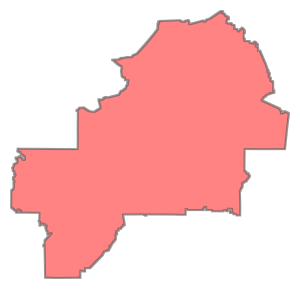

In [21]:
from functools import partial
import fiona
import json
import pyproj
from shapely.geometry import mapping, shape
from shapely.ops import transform

project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'),
    pyproj.Proj(init='epsg:3857'))

txt = open('/tmp/mask.json').read()
js = json.loads(txt)
geom = shape(js)
center = geom.centroid
chatta_poly = transform(project, geom)
chatta_poly

In [12]:
M.remove_layer(M.layers[0])

Removing layer 7280949437721010636__nlcd-tms-epsg3857
---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "7280949437721010636__nlcd-tms-epsg3857", "required": true}], "method": "remove_layer", "id": "f6b03077-295b-41a3-b724-153f06b3334d"}
---END MESSAGE---


In [22]:
from geonotebook.wrappers import VectorData
vd = VectorData("/tmp/mask.json")
name = "Outline"
M.add_layer(vd, name=name)

---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "Outline", "required": true}, {"key": "vis_url", "value": {"features": [{"type": "Feature", "id": "0", "properties": {"_geonotebook_feature_id": 0}, "geometry": {"coordinates": [[[-84.79763023500459, 35.82530328564554], [-84.79763023500459, 35.82505644095016], [-84.79787707969996, 35.82505644095016], [-84.79837076909071, 35.82505644095016], [-84.79837076909071, 35.82480959625479], [-84.79861761378609, 35.82480959625479], [-84.79861761378609, 35.82456275155941], [-84.79886445848146, 35.82456275155941], [-84.79911130317684, 35.82456275155941], [-84.79911130317684, 35.82431590686404], [-84.79935814787221, 35.82431590686404], [-84.79935814787221, 35.82406906216866], [-84.79960499256758, 35.82406906216866], [-84.80059237134908, 35.82406906216866], [-84.80059237134908, 35.823822217473285], [-84.80083921604447, 35.823822217473285], [-84.80108606073983, 35.823822217473285], [-84.80108606073983, 35.8235753

In [23]:
M.set_center(center.x, center.y, 9)

---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "x", "value": -85.2934168635424, "required": true}, {"key": "y", "value": 35.02445474101138, "required": true}, {"key": "z", "value": 9, "required": true}], "method": "set_center", "id": "12d1b45a-0988-4eca-ad63-f9f3ce31ae95"}
---END MESSAGE---


## Fetching an RDD of NLCD masked to Chattanooga

In [24]:
MAX_ZOOM = 12
rdd = query(geopysc, SPATIAL, catalog_uri, layer_name, 12, intersects=chatta_poly)

In [25]:
rdd = rdd.mask([chatta_poly])
rd = RddRasterData(rdd)

In [26]:
M.remove_layer(M.layers[0])

Removing layer Outline
---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "Outline", "required": true}], "method": "remove_layer", "id": "724ccf3b-b2fa-40db-a1e4-756fe5d4254c"}
---END MESSAGE---


In [27]:
M.add_layer(rd, render_tile=render_nlcd)

---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "-9223363308538469384", "required": true}, {"key": "vis_url", "value": "http://localhost:8000/user/hadoop/geotrellis/59535", "required": true}, {"key": "vis_params", "value": {"zIndex": 0, "kernel_id": "a0553ae2-f9da-4abc-864e-c737951d1b16", "gamma": 1.0, "attribution": null, "colormap": [], "opacity": 1.0, "projection": "EPSG:3857", "layer_type": null, "interval": null}, "required": true}, {"key": "query_params", "value": {}, "required": true}], "method": "add_layer", "id": "68e09d94-d57a-493e-847e-d23ba006a442"}
---END MESSAGE---


## Reclassifying an RDD

In [35]:
nprdd = rdd.to_numpy_rdd().cache()

In [36]:
rc = np.vectorize(reclass)
def mapper(tile):
    arr = tile['data'][0]
    tile['data'] = np.array([rc(arr)])
    return tile
reclassed = nprdd.mapValues(mapper)
gtRdd = TiledRasterRDD.from_numpy_rdd(geopysc, SPATIAL, reclassed, rdd.layer_metadata)

In [37]:
cmap = { 0 : "#00000000", 1: "#579D57FF" }
cmap_render = single_band_render_from_color_map(cmap)
def render_tile(tile):
    arr = tile[0]
    return cmap_render(arr)

In [38]:
rd = RddRasterData(gtRdd)

In [33]:
M.remove_layer(M.layers[0])

Removing layer -9223363308538469384
---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "-9223363308538469384", "required": true}], "method": "remove_layer", "id": "b3c11784-f3d8-4145-a0bf-76cc647399e6"}
---END MESSAGE---


In [39]:
M.add_layer(rd, render_tile=render_tile)

---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "-9223363308516509248", "required": true}, {"key": "vis_url", "value": "http://localhost:8000/user/hadoop/geotrellis/49685", "required": true}, {"key": "vis_params", "value": {"zIndex": 0, "kernel_id": "a0553ae2-f9da-4abc-864e-c737951d1b16", "gamma": 1.0, "attribution": null, "colormap": [], "opacity": 1.0, "projection": "EPSG:3857", "layer_type": null, "interval": null}, "required": true}, {"key": "query_params", "value": {}, "required": true}], "method": "add_layer", "id": "af14d85c-a37d-44a8-b557-e3bcbdcb3fdc"}
---END MESSAGE---


## Saving the reclassified layer locally

In [41]:
local_catalog_uri = "file://home/hadoop/notebooks/catalog"

In [42]:
for layer_rdd in gtRdd.pyramid(MAX_ZOOM, 0):
    write(local_catalog_uri, "forest-land-cover", layer_rdd)


/home/hadoop/.local/lib/python3.4/site-packages/geonotebook/vis/geotrellis/server.py:66: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if arr == None:
::1 - - [2017-05-14 03:07:32] "GET /tile/14/4310/6488.png HTTP/1.1" 200 533 18.215162
::1 - - [2017-05-14 03:07:33] "GET /tile/14/4309/6488.png HTTP/1.1" 200 1174 1.237127
::1 - - [2017-05-14 03:07:34] "GET /tile/14/4310/6487.png HTTP/1.1" 200 436 1.228348
::1 - - [2017-05-14 03:07:36] "GET /tile/14/4310/6489.png HTTP/1.1" 200 648 1.822134
::1 - - [2017-05-14 03:07:38] "GET /tile/14/4311/6488.png HTTP/1.1" 200 1220 1.561035
::1 - - [2017-05-14 03:07:39] "GET /tile/14/4309/6489.png HTTP/1.1" 200 1405 1.258342
::1 - - [2017-05-14 03:07:40] "GET /tile/14/4276/6511.png HTTP/1.1" 200 2095 1.486885
::1 - - [2017-05-14 03:07:42] "GET /tile/14/4277/6511.png HTTP/1.1" 200 1315 1.757232
::1 - - [2017-05-14 03:07:43] "GET /tile/14/4276/6510.png HTTP/1.1" 200 1853 1.077754
::1 - - [2017-05-14 03

::1 - - [2017-05-14 03:10:21] "GET /tile/10/270/403.png HTTP/1.1" 200 16485 0.332512
::1 - - [2017-05-14 03:10:21] "GET /tile/10/265/403.png HTTP/1.1" 500 680 0.001594
::1 - - [2017-05-14 03:10:21] "GET /tile/10/270/408.png HTTP/1.1" 500 524 0.070969
::1 - - [2017-05-14 03:10:22] "GET /tile/12/1069/1627.png HTTP/1.1" 200 8808 0.798497
::1 - - [2017-05-14 03:10:22] "GET /tile/12/1068/1627.png HTTP/1.1" 200 8126 0.669265
::1 - - [2017-05-14 03:10:23] "GET /tile/12/1069/1626.png HTTP/1.1" 200 9774 0.782879
::1 - - [2017-05-14 03:10:24] "GET /tile/12/1069/1628.png HTTP/1.1" 200 8729 0.741813
::1 - - [2017-05-14 03:10:25] "GET /tile/12/1070/1627.png HTTP/1.1" 200 8842 0.741954
::1 - - [2017-05-14 03:10:25] "GET /tile/12/1068/1628.png HTTP/1.1" 200 6952 0.735175
::1 - - [2017-05-14 03:10:26] "GET /tile/12/1068/1626.png HTTP/1.1" 200 6788 0.740816
::1 - - [2017-05-14 03:10:27] "GET /tile/12/1070/1626.png HTTP/1.1" 200 9500 0.725640
::1 - - [2017-05-14 03:10:28] "GET /tile/12/1070/1628.png HTT

## Viewing the local layer

In [44]:
data = GeoTrellisCatalogLayerData(geopysc, 
                                  local_catalog_uri, 
                                  "forest-land-cover",
                                  SPATIAL)

In [46]:
M.remove_layer(M.layers[0])

Removing layer -6256423484826201344__forest-land-cover
---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "-6256423484826201344__forest-land-cover", "required": true}], "method": "remove_layer", "id": "4230eea8-370e-44d3-9c34-f9b0b2bad0aa"}
---END MESSAGE---


In [45]:
M.add_layer(data, render_tile=render_tile)

---MESSAGE---
<class 'dict'>
{"jsonrpc": "2.0", "params": [{"key": "layer_name", "value": "-6256423484826201344__forest-land-cover", "required": true}, {"key": "vis_url", "value": "http://localhost:8000/user/hadoop/geotrellis/55585", "required": true}, {"key": "vis_params", "value": {"zIndex": 0, "kernel_id": "a0553ae2-f9da-4abc-864e-c737951d1b16", "gamma": 1.0, "attribution": null, "colormap": [], "opacity": 1.0, "projection": "EPSG:3857", "layer_type": null, "interval": null}, "required": true}, {"key": "query_params", "value": {}, "required": true}], "method": "add_layer", "id": "0ba01a69-0f6f-4459-ab3c-03333f87b976"}
---END MESSAGE---


::1 - - [2017-05-14 03:11:54] "GET /tile/9/133/202.png HTTP/1.1" 200 9711 0.993495
::1 - - [2017-05-14 03:11:55] "GET /tile/9/133/203.png HTTP/1.1" 200 39248 0.987324
::1 - - [2017-05-14 03:11:56] "GET /tile/9/134/202.png HTTP/1.1" 200 50866 0.875069
::1 - - [2017-05-14 03:11:57] "GET /tile/9/134/203.png HTTP/1.1" 200 44716 0.878037
::1 - - [2017-05-14 03:11:57] "GET /tile/9/132/202.png HTTP/1.1" 500 2796 0.014876
::1 - - [2017-05-14 03:11:58] "GET /tile/9/133/204.png HTTP/1.1" 200 7492 0.854767
::1 - - [2017-05-14 03:11:58] "GET /tile/9/132/203.png HTTP/1.1" 500 2796 0.033585
::1 - - [2017-05-14 03:11:59] "GET /tile/9/134/201.png HTTP/1.1" 200 18123 0.907549
::1 - - [2017-05-14 03:11:59] "GET /tile/9/133/201.png HTTP/1.1" 500 2796 0.005354
::1 - - [2017-05-14 03:12:00] "GET /tile/9/134/204.png HTTP/1.1" 200 1771 0.900232
::1 - - [2017-05-14 03:12:01] "GET /tile/9/135/202.png HTTP/1.1" 200 56321 0.940214
::1 - - [2017-05-14 03:12:02] "GET /tile/9/135/203.png HTTP/1.1" 200 21549 0.85806